In [1]:
import pandas as pd
import numpy as np

import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew

In [2]:
#df = pd.read_csv('C:/penn_State/Pred analytics/Assignment/flights.csv')
df = pd.read_csv('C:/penn_State/Pred analytics/Assignment/FlightDelays1.csv')

In [3]:
df.head(10)

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,1/1/2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,1/1/2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,1/1/2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,1/1/2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,1/1/2004,7814,IAD,0,4,1,N685BR,ontime


In [59]:
df.dayweek.unique()

array([4, 5, 6, 7, 1, 2, 3], dtype=int64)

In [5]:
df.isnull().sum()

schedtime       0
carrier         0
deptime         0
dest            0
distance        0
date            0
flightnumber    0
origin          0
weather         0
dayweek         0
daymonth        0
tailnu          0
delay           0
dtype: int64

In [6]:
#df = df.drop(['WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','SECURITY_DELAY','AIR_SYSTEM_DELAY','CANCELLATION_REASON'], axis=1)

In [7]:
#df.isnull().sum()

In [8]:
#df = df.dropna()

In [9]:
#df.isnull().sum()

In [10]:
df.count()

schedtime       2201
carrier         2201
deptime         2201
dest            2201
distance        2201
date            2201
flightnumber    2201
origin          2201
weather         2201
dayweek         2201
daymonth        2201
tailnu          2201
delay           2201
dtype: int64

In [11]:
df.describe()

,schedtime,deptime,distance,flightnumber,weather,dayweek,daymonth
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [12]:
df.skew(axis = 0, skipna = True)


C:\Users\rikin\AppData\Local\Temp\ipykernel_12732\3041846473.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0, skipna = True)


schedtime      -0.137580
deptime        -0.152045
distance       -1.627681
flightnumber    0.601224
weather         8.117006
dayweek         0.025803
daymonth        0.034177
dtype: float64

In [13]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

#split data into X and y
X = df[['YEAR', 'MONTH', 'DAY', 
             'DAY_OF_WEEK', 'FLIGHT_NUMBER','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE', 
             'SCHEDULED_ARRIVAL']]
y = df[['CANCELLED']]

In [14]:
# split data into X and y
X = df[['schedtime', 'carrier', 'dest', 
              'flightnumber','origin','weather','dayweek', 
             'daymonth','tailnu']]
y = df[['delay']]

In [15]:
X

,schedtime,carrier,dest,flightnumber,origin,weather,dayweek,daymonth,tailnu
0,1455,OH,JFK,5935,BWI,0,4,1,N940CA
1,1640,DH,JFK,6155,DCA,0,4,1,N405FJ
2,1245,DH,LGA,7208,IAD,0,4,1,N695BR
3,1715,DH,LGA,7215,IAD,0,4,1,N662BR
4,1039,DH,LGA,7792,IAD,0,4,1,N698BR
...,...,...,...,...,...,...,...,...,...
2196,645,RU,EWR,2761,DCA,0,6,31,N15555
2197,1700,RU,EWR,2497,IAD,0,6,31,N16976
2198,1600,RU,EWR,2361,DCA,0,6,31,N14902
2199,1359,RU,EWR,2216,DCA,0,6,31,N16961


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   schedtime     2201 non-null   int64 
 1   carrier       2201 non-null   object
 2   dest          2201 non-null   object
 3   flightnumber  2201 non-null   int64 
 4   origin        2201 non-null   object
 5   weather       2201 non-null   int64 
 6   dayweek       2201 non-null   int64 
 7   daymonth      2201 non-null   int64 
 8   tailnu        2201 non-null   object
dtypes: int64(5), object(4)
memory usage: 154.9+ KB


In [17]:
#converting categorical variables to numerical representation
X["carrier"] = pd.factorize(X["carrier"])[0]
X["dest"] = pd.factorize(X["dest"])[0]
X["tailnu"] = pd.factorize(X["tailnu"])[0]
X["origin"] = pd.factorize(X["origin"])[0]

y["delay"] = pd.factorize(y["delay"])[0]

C:\Users\rikin\AppData\Local\Temp\ipykernel_12732\1642247243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["carrier"] = pd.factorize(X["carrier"])[0]
C:\Users\rikin\AppData\Local\Temp\ipykernel_12732\1642247243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["dest"] = pd.factorize(X["dest"])[0]
C:\Users\rikin\AppData\Local\Temp\ipykernel_12732\1642247243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [18]:
X

,schedtime,carrier,dest,flightnumber,origin,weather,dayweek,daymonth,tailnu
0,1455,0,0,5935,0,0,4,1,0
1,1640,1,0,6155,1,0,4,1,1
2,1245,1,1,7208,2,0,4,1,2
3,1715,1,1,7215,2,0,4,1,3
4,1039,1,1,7792,2,0,4,1,4
...,...,...,...,...,...,...,...,...,...
2196,645,6,2,2761,1,0,6,31,351
2197,1700,6,2,2497,2,0,6,31,303
2198,1600,6,2,2361,1,0,6,31,454
2199,1359,6,2,2216,1,0,6,31,62


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   schedtime     2201 non-null   int64
 1   carrier       2201 non-null   int64
 2   dest          2201 non-null   int64
 3   flightnumber  2201 non-null   int64
 4   origin        2201 non-null   int64
 5   weather       2201 non-null   int64
 6   dayweek       2201 non-null   int64
 7   daymonth      2201 non-null   int64
 8   tailnu        2201 non-null   int64
dtypes: int64(9)
memory usage: 154.9 KB


In [20]:
y

,delay
0,0
1,0
2,0
3,0
4,0
...,...
2196,0
2197,0
2198,0
2199,0


In [21]:
features = X.columns

[0.0476182  0.03593901 0.07254791 0.04493827 0.03731771 0.63219655
 0.04391717 0.04892968 0.03659558] Index(['schedtime', 'carrier', 'dest', 'flightnumber', 'origin', 'weather',
       'dayweek', 'daymonth', 'tailnu'],
      dtype='object')


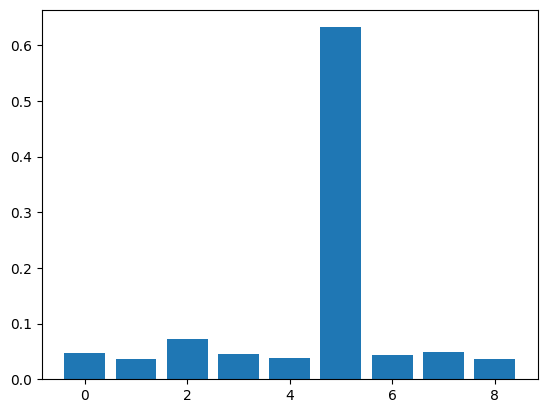

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

# fit model no training data

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)


print(xgb.feature_importances_,features)

# plot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()  

#plot_importance(model)
#pyplot.show()

# REMOVE TAIL NUMBER

In [23]:
# split data into X and y
X = df[['schedtime', 'carrier', 'dest', 
              'flightnumber','origin','weather','dayweek', 
             'daymonth']]
y = df[['delay']]

In [24]:
#converting categorical variables to numerical representation
X["carrier"] = pd.factorize(X["carrier"])[0]
X["dest"] = pd.factorize(X["dest"])[0]
X["origin"] = pd.factorize(X["origin"])[0]

y["delay"] = pd.factorize(y["delay"])[0]

C:\Users\rikin\AppData\Local\Temp\ipykernel_12732\4109869327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["carrier"] = pd.factorize(X["carrier"])[0]
C:\Users\rikin\AppData\Local\Temp\ipykernel_12732\4109869327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["dest"] = pd.factorize(X["dest"])[0]
C:\Users\rikin\AppData\Local\Temp\ipykernel_12732\4109869327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [25]:
X

,schedtime,carrier,dest,flightnumber,origin,weather,dayweek,daymonth
0,1455,0,0,5935,0,0,4,1
1,1640,1,0,6155,1,0,4,1
2,1245,1,1,7208,2,0,4,1
3,1715,1,1,7215,2,0,4,1
4,1039,1,1,7792,2,0,4,1
...,...,...,...,...,...,...,...,...
2196,645,6,2,2761,1,0,6,31
2197,1700,6,2,2497,2,0,6,31
2198,1600,6,2,2361,1,0,6,31
2199,1359,6,2,2216,1,0,6,31


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   schedtime     2201 non-null   int64
 1   carrier       2201 non-null   int64
 2   dest          2201 non-null   int64
 3   flightnumber  2201 non-null   int64
 4   origin        2201 non-null   int64
 5   weather       2201 non-null   int64
 6   dayweek       2201 non-null   int64
 7   daymonth      2201 non-null   int64
dtypes: int64(8)
memory usage: 137.7 KB


In [27]:
df.origin.unique()

array(['BWI', 'DCA', 'IAD'], dtype=object)

In [28]:
y

,delay
0,0
1,0
2,0
3,0
4,0
...,...
2196,0
2197,0
2198,0
2199,0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [30]:
X_train

,schedtime,carrier,dest,flightnumber,origin,weather,dayweek,daymonth
1625,1530,2,1,1758,1,0,5,23
2181,1500,5,1,2176,1,0,6,31
1523,1040,1,1,7792,2,0,4,22
362,2000,5,1,2186,1,0,2,6
1230,2030,2,1,1768,1,0,7,18
...,...,...,...,...,...,...,...,...
1987,1245,1,1,7208,2,0,4,29
1283,1030,2,1,1748,1,0,1,19
1414,840,1,2,7299,2,0,2,20
1691,1715,1,0,7812,2,0,6,24


# Logistic Regression

In [31]:

from sklearn import datasets, linear_model, metrics
   
reg = linear_model.LogisticRegression(max_iter=500)
   
# train the model using the training sets
reg.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = reg.predict(X_test)
   
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", 
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 81.85941043083899


C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
 

def print_score(clf, X_train, y_train,
                X_test, y_test,
                train=True):
  
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
  
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))
  
        res = cross_val_score(clf, X_train, y_train,
                              cv=10, scoring='accuracy')
  
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("----------------------------------------------------------")
  
    elif train == False:
  
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
  
        print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test))))
  
        print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
  
        print("-----------------------------------------------------------")
  

In [33]:
print_score(reg, X_train, y_train,
            X_test, y_test,
            train=True)
  
print_score(reg, X_train, y_train,
            X_test, y_test,
            train=False)

C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1417
           1       1.00      0.08      0.15       343

    accuracy                           0.82      1760
   macro avg       0.91      0.54      0.52      1760
weighted avg       0.85      0.82      0.75      1760


Confusion Matrix: 
 [[1417    0]
 [ 316   27]]



C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average Accuracy: 	 0.8153
Accuracy SD: 		 0.0106
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       356
           1       1.00      0.06      0.11        85

    accuracy                           0.82       441
   macro avg       0.91      0.53      0.51       441
weighted avg       0.85      0.82      0.75       441


Confusion Matrix: 
 [[356   0]
 [ 80   5]]

accuracy score: 0.8186

-----------------------------------------------------------


C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot: >

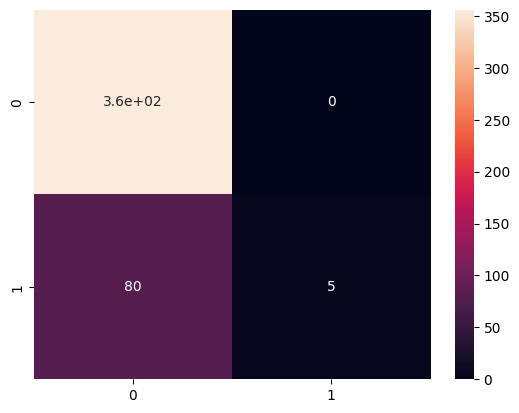

In [34]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Support Vector Classifier

In [1]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
 
from sklearn.svm import SVC
 
# Building a Support Vector Machine on train data
svc_model1 = SVC(C= .1, kernel='linear', gamma= 1)
svc_model1.fit(X_train, y_train)
 
y_pred = svc_model1.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
# check the accuracy on the training set
print(svc_model1.score(X_train, y_train))
print(svc_model1.score(X_test, y_test))

In [ ]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

In [37]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8051136363636363
0.8072562358276644


In [39]:

#Building a Support Vector Machine on train data(changing the kernel)
svc_model2  = SVC(kernel='poly')
svc_model2.fit(X_train, y_train)
 
y_pred = svc_model2.predict(X_test)
 
print(svc_model2.score(X_train, y_train))
print(svc_model2.score(X_test, y_test))

0.8051136363636363
0.8072562358276644


C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:

svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)
 
y_pred= svc_model.predict(X_test)
 
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7511363636363636
0.746031746031746


C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
print_score(svc_model2, X_train, y_train,
            X_test, y_test,
            train=True)
  
print_score(svc_model2, X_train, y_train,
            X_test, y_test,
            train=False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1417
           1       0.00      0.00      0.00       343

    accuracy                           0.81      1760
   macro avg       0.40      0.50      0.45      1760
weighted avg       0.65      0.81      0.72      1760


Confusion Matrix: 
 [[1417    0]
 [ 343    0]]



C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikin\anac

Average Accuracy: 	 0.8051
Accuracy SD: 		 0.0026
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       356
           1       0.00      0.00      0.00        85

    accuracy                           0.81       441
   macro avg       0.40      0.50      0.45       441
weighted avg       0.65      0.81      0.72       441


Confusion Matrix: 
 [[356   0]
 [ 85   0]]

accuracy score: 0.8073

-----------------------------------------------------------


C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarnin

<AxesSubplot: >

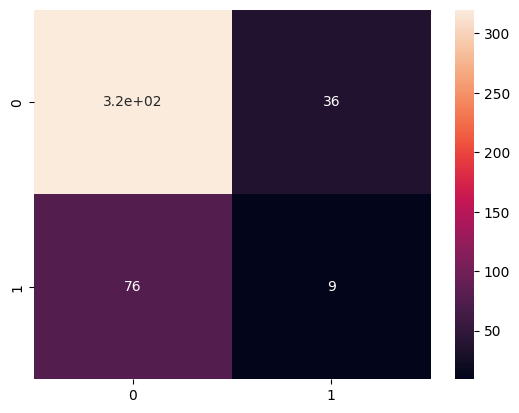

In [43]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

criteria = ['gini', 'entropy']
scores = {}
 
for c in criteria:
    dt = DecisionTreeClassifier(criterion = c)
    dt.fit(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    scores = test_score
 
print(scores)

0.782312925170068


In [45]:
#Fitting Decision Tree classifier to the training set  

from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

#Predicting the test set result  
y_pred= classifier.predict(X_test)  

print(classifier.score(X_test, y_test)) 

0.780045351473923


In [46]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.780045351473923


In [47]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [48]:
print(cm)

[[308  48]
 [ 49  36]]


In [49]:
print_score(classifier, X_train, y_train,
            X_test, y_test,
            train=True)
  
print_score(classifier, X_train, y_train,
            X_test, y_test,
            train=False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1417
           1       1.00      1.00      1.00       343

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760


Confusion Matrix: 
 [[1417    0]
 [   0  343]]

Average Accuracy: 	 0.7625
Accuracy SD: 		 0.0185
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       356
           1       0.43      0.42      0.43        85

    accuracy                           0.78       441
   macro avg       0.65      0.64      0.64       441
weighted avg       0.78      0.78      0.78       441


Confusion Matrix: 
 [[308  48]
 [ 49  36]]

accuracy score: 0.7800

-----------------

<AxesSubplot: >

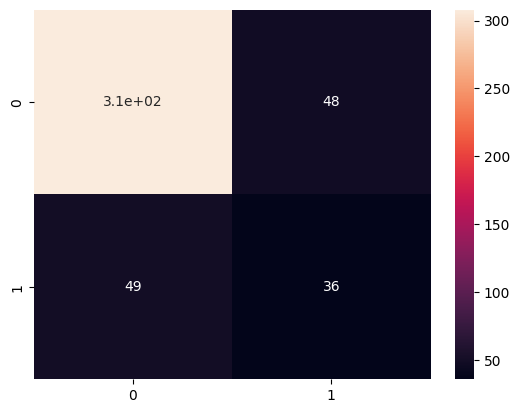

In [50]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
rfc = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = rfc.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

C:\Users\rikin\AppData\Local\Temp\ipykernel_12732\1919382648.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)



ACCURACY OF THE MODEL:  0.8276643990929705


In [52]:
X_train

,schedtime,carrier,dest,flightnumber,origin,weather,dayweek,daymonth
1625,1530,2,1,1758,1,0,5,23
2181,1500,5,1,2176,1,0,6,31
1523,1040,1,1,7792,2,0,4,22
362,2000,5,1,2186,1,0,2,6
1230,2030,2,1,1768,1,0,7,18
...,...,...,...,...,...,...,...,...
1987,1245,1,1,7208,2,0,4,29
1283,1030,2,1,1748,1,0,1,19
1414,840,1,2,7299,2,0,2,20
1691,1715,1,0,7812,2,0,6,24


In [53]:
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

Confusion Matrix:
 [[343  63]
 [ 13  22]]


In [54]:
print_score(rfc, X_train, y_train,
            X_test, y_test,
            train=True)
  
print_score(rfc, X_train, y_train,
            X_test, y_test,
            train=False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1417
           1       1.00      1.00      1.00       343

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760


Confusion Matrix: 
 [[1417    0]
 [   1  342]]



C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rikin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:

Average Accuracy: 	 0.8131
Accuracy SD: 		 0.0191
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       356
           1       0.63      0.26      0.37        85

    accuracy                           0.83       441
   macro avg       0.74      0.61      0.63       441
weighted avg       0.80      0.83      0.80       441


Confusion Matrix: 
 [[343  13]
 [ 63  22]]

accuracy score: 0.8277

-----------------------------------------------------------


<AxesSubplot: >

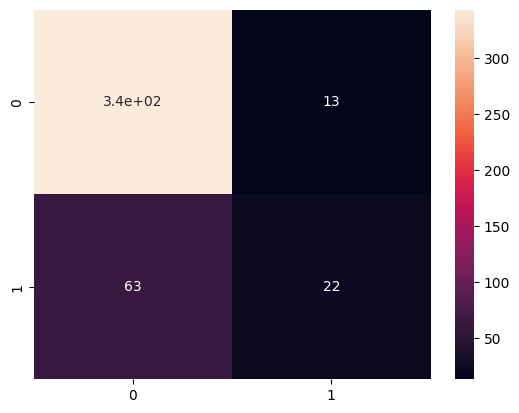

In [55]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# SAVE MODEL

In [56]:
import joblib

# save the model to disk
joblib.dump(rfc, 'rf_model.sav')

['rf_model.sav']

In [57]:
def predict_delay(schedtime, carrier, dest, flightnumber, origin, weather, dayweek, daymonth) :
    prediction = rfc.predict(pd.DataFrame([[schedtime, carrier, dest, flightnumber, origin, weather, dayweek, daymonth]], columns=['schedtime', 'carrier', 'dest', 'flightnumber', 'origin', 'weather', 'dayweek', 'daymonth']))
    return prediction

In [58]:
y_pred = predict_delay(2311, 2, 1, 1123, 1, 0, 6, 12)

In [ ]:
print(y_pred[0])